In [10]:
import numpy as np
from lattice_class import *
from hamiltonian_constructor_class import *
import scipy.linalg
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 150

# 1. Create Lattice

Flagged Bonds = [(79, 7), (78, 15), (77, 23), (76, 31), (75, 39), (74, 47), (73, 55), (72, 63)]
[(0.0, 15.0), (1.0, 15.0), (2.0, 15.0), (3.0, 15.0), (4.0, 15.0), (5.0, 15.0), (6.0, 15.0), (7.0, 15.0), (0.0, 14.0), (1.0, 14.0), (2.0, 14.0), (3.0, 14.0), (4.0, 14.0), (5.0, 14.0), (6.0, 14.0), (7.0, 14.0), (0.0, 13.0), (1.0, 13.0), (2.0, 13.0), (3.0, 13.0), (4.0, 13.0), (5.0, 13.0), (6.0, 13.0), (7.0, 13.0), (0.0, 12.0), (1.0, 12.0), (2.0, 12.0), (3.0, 12.0), (4.0, 12.0), (5.0, 12.0), (6.0, 12.0), (7.0, 12.0), (0.0, 11.0), (1.0, 11.0), (2.0, 11.0), (3.0, 11.0), (4.0, 11.0), (5.0, 11.0), (6.0, 11.0), (7.0, 11.0), (0.0, 10.0), (1.0, 10.0), (2.0, 10.0), (3.0, 10.0), (4.0, 10.0), (5.0, 10.0), (6.0, 10.0), (7.0, 10.0), (0.0, 9.0), (1.0, 9.0), (2.0, 9.0), (3.0, 9.0), (4.0, 9.0), (5.0, 9.0), (6.0, 9.0), (7.0, 9.0), (0.0, 8.0), (1.0, 8.0), (2.0, 8.0), (3.0, 8.0), (4.0, 8.0), (5.0, 8.0), (6.0, 8.0), (7.0, 8.0), (0.0, 7.0), (1.0, 7.0), (2.0, 7.0), (3.0, 7.0), (4.0, 7.0), (5.0, 7.0), (6.0, 7.0), (7.

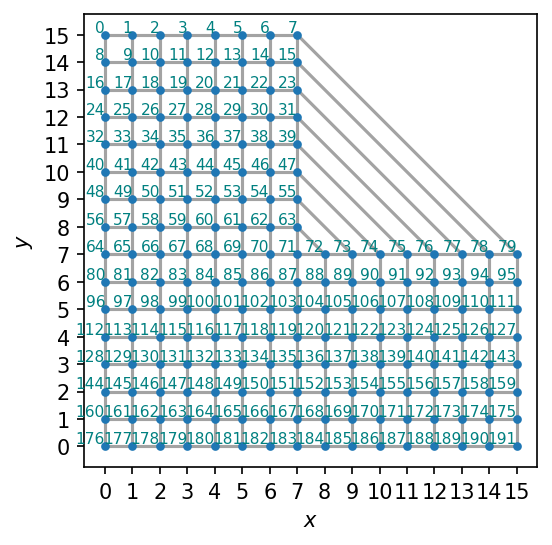

In [11]:
n = 1
hop_phase = np.exp(n * complex(0.0, 1.0) * np.pi / 2.0)

N = 16
lattice = SquareLattice(N, "open")
lattice.add_bonds(
    [(N // 2 - 1 + j * N, N // 2 * N + N - 1 - j) for j in range(N // 2)],
    [(2, 0) for i in range(N // 2)],
)

lattice.remove_sites([(i * N + j) for i in range(N // 2) for j in range(N // 2, N)])

flagged_bonds = [((N//2)**2 + N - (i+1), i * N//2 + N//2 - 1) for i in range(N//2)]

# flagged_bonds = [(28, 29), (39, 40), (50, 51), (61, 62), (72, 73), (83, 84)]
# flagged_bonds = [(51, 52), (62, 63), (73, 74), (84, 85)]
# flagged_bonds = [(20, 25), (22, 27), (21, 26), (23, 28), (24, 29)]
# flagged_bonds = [(35, 4), (34, 9), (33, 14), (32, 19), (31, 24)]
# flagged_bonds = [(25, 36), (26, 37), (27, 38), (28, 39), (29, 40)]
# flagged_bonds = [(30, 31), (41, 42), (52, 53), (62, 64), (74, 75), (85, 86)]
# flagged_bonds = [
#     (N // 2 * (N // 2) + j, N // 2 * (N // 2) + N + j) for j in range(N // 2)
# ]


# flagged_bonds = [(79, 7), (78, 15), (77, 23), (76, 31), (75, 39), (74, 47), (73, 55), (72, 63)]

# flagged_bonds = [(56, 64), (57, 65), (58, 66), (59, 67), (60, 68), (61, 69), (62, 70)]
print("Flagged Bonds =", flagged_bonds)

lattice_sites = lattice.get_sites()
lattice_bonds = lattice.get_bonds()
num_sites = lattice.get_num_sites()

print(lattice._sites)
print(lattice._bonds)
print(lattice._local_bond_idx)
lattice.plot(True)

Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site hamiltonian
Added site 

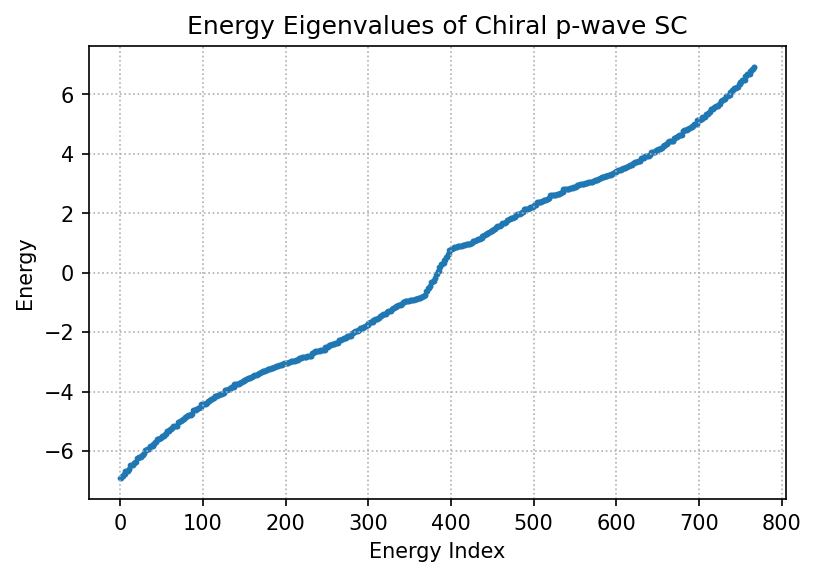

In [12]:
mu = 1.0
delta = complex(1.0, 0.0)
t = 1.0

Ham_constructor = HamiltonianConstructor(mu-4*t, 2*t, 2*t, delta)
H_direct_lattice = Ham_constructor.construct_direct_lattice_hamiltonian(lattice)
block_indices = Ham_constructor.get_block_indices(num_sites)

for flagged_bond in flagged_bonds:
    Ham_constructor.add_phase(H_direct_lattice, flagged_bond, hop_phase, num_sites)

energies, states = scipy.linalg.eigh(H_direct_lattice)

tol = 0.05
low_energy_indices = np.argwhere(np.abs(energies) < tol)[:, 0]
print(low_energy_indices)

print("Lowest found energy: ", np.min(np.abs(energies)))
gs_idx = np.argmin(np.abs(energies))

# gs_idx = 764//2

print("Index of lowest absolute energy: ", gs_idx)

plt.xlabel("Energy Index")
plt.ylabel("Energy")
plt.grid(linestyle=":")
plt.title("Energy Eigenvalues of Chiral p-wave SC")
plt.scatter(range(len(energies)), energies, s=3)

print("energies = ", energies)

Index = 383


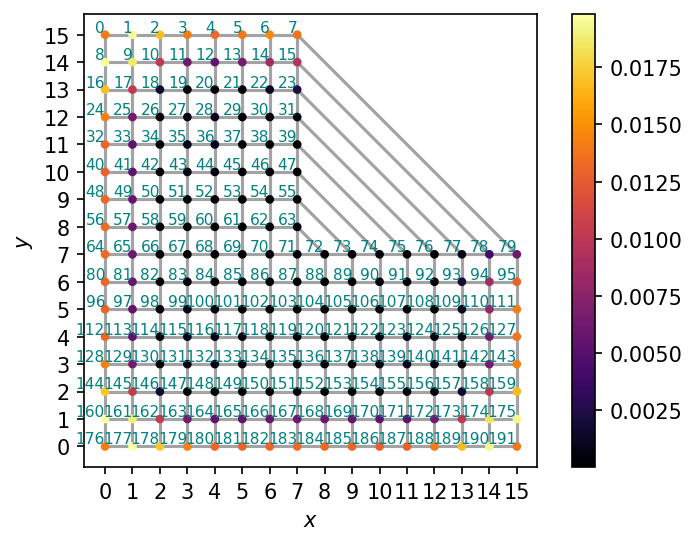

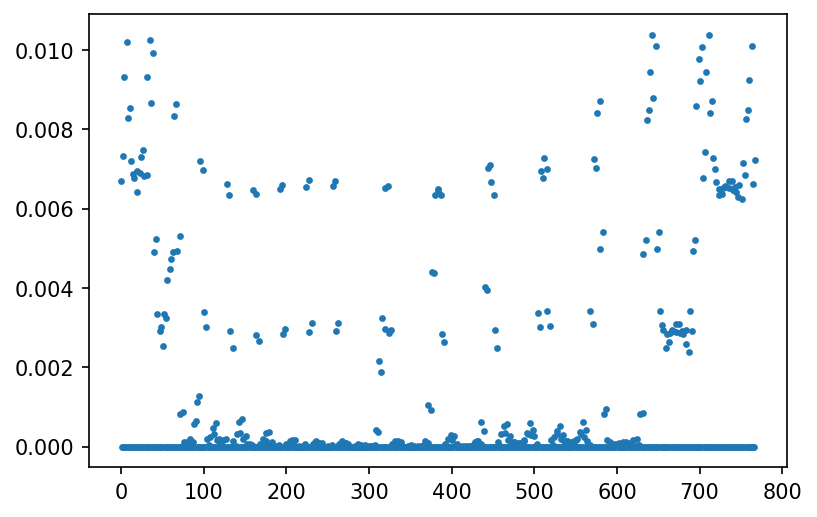

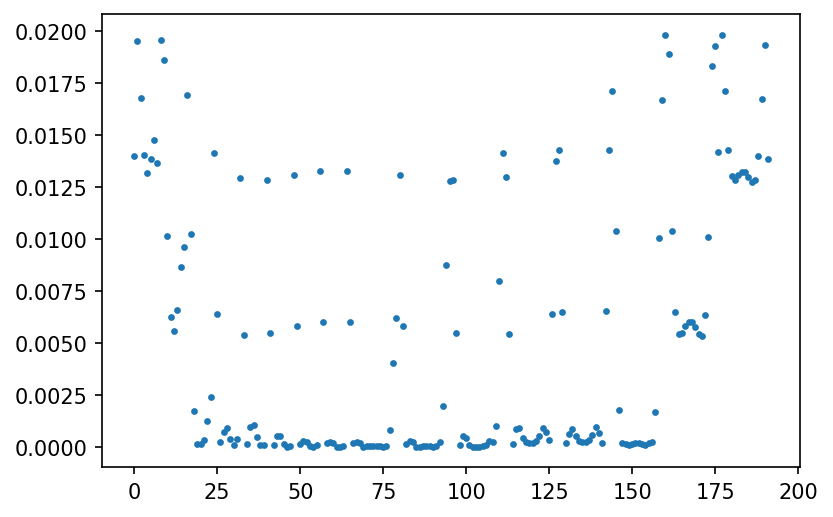

In [13]:
for gs_idx in range(gs_idx, gs_idx + 1):
    print("Index =", gs_idx)
    gs_wave_function = states[:, gs_idx]

    gs_probabilities_nambu = np.square(np.abs(gs_wave_function))
    gs_probabilities = np.zeros(shape=(num_sites, 1))

    for site_idx in range(num_sites):
        gs_probabilities[site_idx] = np.sum(
            gs_probabilities_nambu[block_indices[site_idx]]
        )

    x_values = [k[0] for k in lattice_sites]
    y_values = [k[1] for k in lattice_sites]

    color_map = plt.get_cmap("inferno")
    sc = lattice.plot(True, c=(gs_probabilities), cmap=color_map)

    plt.colorbar(sc)
    plt.show()

    plt.scatter(range(len(gs_probabilities_nambu)), gs_probabilities_nambu, s=5)
    plt.show()
    plt.scatter(range(len(gs_probabilities)), gs_probabilities, s=5)
    plt.show()

## Hop phase results

### Including bond nearest to disclination
n = 0: hop_phase  = $e^{\frac{n\pi}{2}} = 1.0$ hase Lowest found energy:  0.04159891581792905

n = 1: hop_phase = $e^{\frac{n\pi}{2}} = 1.0i$ has Lowest found energy:  0.040238925057125174

n = -1: hop_phase = $e^{\frac{n\pi}{2}}= -1.0i$ has Lowest found energy:  0.04023892505712552

### Excluding bond nearest to disclination
n = 0: hop_phase  = $e^{\frac{n\pi}{2}} = 1.0$ hase Lowest found energy:  0.04159891581792905

n = 1: hop_phase = $e^{\frac{n\pi}{2}} = 1.0i$ has Lowest found energy:  0.040297000282122006

n = -1: hop_phase = $e^{\frac{n\pi}{2}}= -1.0i$ has Lowest found energy:  0.040297000282122006

In [14]:
half_filling_energy = np.sum(energies[0 : 2 * num_sites])
print("Half filling energy =", half_filling_energy)

Half filling energy = -1259.2703255400181


### Including bond nearest to disclination
$$n=+1: -140.92351803436424$$


$$n=-1: -140.92351803436426$$


$$n=0: -141.16633516847492$$


$$n=2: -140.51117786827353$$


### Exluding bond nearest to disclination
$$n=+1: -140.98592954483732$$


$$n=-1: -140.98592954483732$$


$$n=0: -141.16633516847492$$


$$n=2: -140.66173659874394$$

n = 1: -144.03423246662726


n = -1: -143.88209472829487


n = 0:  -145.10834469612362



n=-1 : Half filling energy = -813.7160537112771
n=+1: Half filling energy = -814.4124051622805
n=0: Half filling energy = -810.5137181368697


In [15]:
print(H_direct_lattice)

[[ 3.+0.j  0.+0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  3.+0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -3.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 ...
 [ 0.+0.j  0.+0.j  0.+0.j ...  3.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...  0.+0.j -3.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...  0.+0.j  0.+0.j -3.+0.j]]


In [16]:
print(H_direct_lattice[block_indices[1], block_indices[2]])

[[ 1.+0.j   0.+0.j   0.+0.j   0.+0.5j]
 [ 0.+0.j   1.+0.j   0.+0.5j  0.+0.j ]
 [ 0.+0.j   0.+0.5j -1.+0.j   0.+0.j ]
 [ 0.+0.5j  0.+0.j   0.+0.j  -1.+0.j ]]


In [17]:
for i in range(num_sites):
    print(H_direct_lattice[block_indices[i], block_indices[i]])
    for neigh_idx in lattice_bonds[i]:
        print(H_direct_lattice[block_indices[i], block_indices[neigh_idx]])

[[ 3.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  3.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -3.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -3.+0.j]]
[[ 1.+0.j   0.+0.j   0.+0.j   0.+0.5j]
 [ 0.+0.j   1.+0.j   0.+0.5j  0.+0.j ]
 [ 0.+0.j   0.+0.5j -1.+0.j   0.+0.j ]
 [ 0.+0.5j  0.+0.j   0.+0.j  -1.+0.j ]]
[[ 1. +0.j  0. +0.j  0. +0.j  0.5+0.j]
 [ 0. +0.j  1. +0.j  0.5+0.j  0. +0.j]
 [ 0. +0.j -0.5+0.j -1. +0.j  0. +0.j]
 [-0.5+0.j  0. +0.j  0. +0.j -1. +0.j]]
[[ 3.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  3.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -3.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -3.+0.j]]
[[ 1.+0.j   0.+0.j   0.+0.j   0.-0.5j]
 [ 0.+0.j   1.+0.j   0.-0.5j  0.+0.j ]
 [ 0.+0.j   0.-0.5j -1.+0.j   0.+0.j ]
 [ 0.-0.5j  0.+0.j   0.+0.j  -1.+0.j ]]
[[ 1.+0.j   0.+0.j   0.+0.j   0.+0.5j]
 [ 0.+0.j   1.+0.j   0.+0.5j  0.+0.j ]
 [ 0.+0.j   0.+0.5j -1.+0.j   0.+0.j ]
 [ 0.+0.5j  0.+0.j   0.+0.j  -1.+0.j ]]
[[ 1. +0.j  0. +0.j  0. +0.j  0.5+0.j]
 [ 0. +0.j  1. +0.j  0.5+0.j  0. +0.j]
 [ 0. +0.j -

In [18]:
print(H_direct_lattice)

[[ 3.+0.j  0.+0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  3.+0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -3.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 ...
 [ 0.+0.j  0.+0.j  0.+0.j ...  3.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...  0.+0.j -3.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...  0.+0.j  0.+0.j -3.+0.j]]
